##### Exploratory data analysis (EDA)

In [2]:
# import Libaries with an alias
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Read the csv file
df = pd.read_csv("E:/1. University Teaching Data/9. PU-CSAS/2. Python Programming for Data Analysis/6. Exploratory data analysis (EDA)/Employee Database.csv")
df

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,1,Male,3-Feb-52,15,Manager,57000,27000,98,144,No
1,2,Male,23-May-58,16,Clerical,40200,18750,98,36,No
2,3,Female,26-Jul-29,12,Clerical,21450,12000,98,381,No
3,4,Female,15-Apr-47,8,Clerical,21900,13200,98,190,No
4,5,Male,9-Feb-55,15,Clerical,45000,21000,98,138,No
...,...,...,...,...,...,...,...,...,...,...
469,470,Male,22-Jan-64,12,Clerical,26250,15750,64,69,Yes
470,471,Male,3-Aug-66,15,Clerical,26400,15750,64,32,Yes
471,472,Male,21-Feb-66,15,Clerical,39150,15750,63,46,No
472,473,Female,25-Nov-37,12,Clerical,21450,12750,63,139,No


##### Data Cleaning and Preparation

In [4]:
# Is the dataframe conatin the missing values?
df.isna().sum() # Total number of missing values against each variable

id          0
gender      0
bdate       0
educ        0
jobcat      0
salary      0
salbegin    0
jobtime     0
prevexp     0
minority    0
dtype: int64

In [5]:
# Delete the row having missing value
empdata = df.dropna()

In [6]:
# Check for the Duplicate rows
empdata.duplicated().value_counts() # False means no duplicate rows in the data

False    450
dtype: int64

In [7]:
# Check the dataframe information (Structure of the data)
empdata.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 473
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        450 non-null    int64  
 1   gender    450 non-null    object 
 2   bdate     450 non-null    object 
 3   educ      450 non-null    int64  
 4   jobcat    450 non-null    object 
 5   salary    450 non-null    int64  
 6   salbegin  450 non-null    int64  
 7   jobtime   450 non-null    int64  
 8   prevexp   450 non-null    float64
 9   minority  450 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 38.7+ KB


##### 1. How many male and female working in the company?

In [6]:
# Using groupby() Function  
# empdata.groupby('gender').count() 
empdata.groupby('gender')['gender'].count()

gender
Female    216
Male      258
Name: gender, dtype: int64

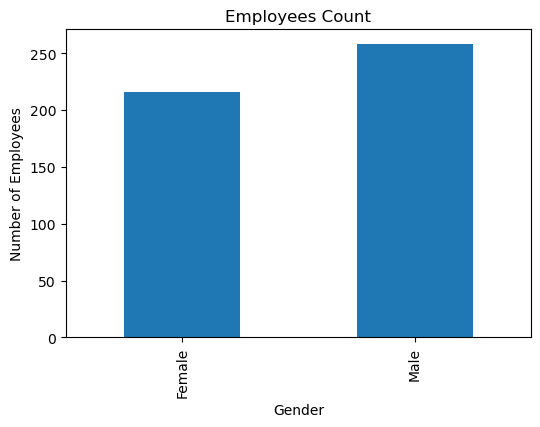

In [7]:
empdata.groupby(['gender'])['gender'].count().plot(kind='bar', figsize=(6,4),
                                                                xlabel="Gender",
                                                                ylabel="Number of Employees", 
                                                                title="Employees Count")
plt.show()

##### 2. With respect to the Job Category, How many male and female working in the company?

In [14]:
empdata.groupby(['jobcat', 'gender'])['gender'].count()

jobcat     gender
Clerical   Female    182
           Male      157
Custodial  Male       27
Manager    Female     10
           Male       74
Name: gender, dtype: int64

In [30]:
# Unstack the data (compulsory before plotting)
empdata.groupby(['jobcat', 'gender'])['gender'].count().unstack()

gender,Female,Male
jobcat,,
Clerical,182.0,157.0
Custodial,NaN,27.0
Manager,10.0,74.0


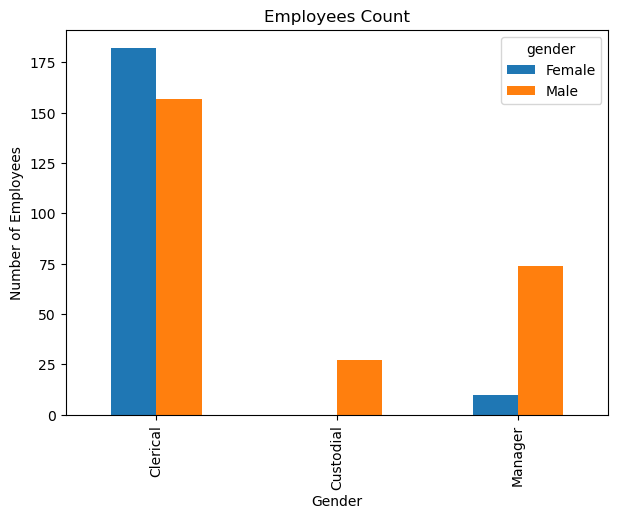

In [31]:
# Muliple Bar Chart
empdata.groupby(['jobcat', 'gender'])['gender'].count().unstack().plot(kind='bar', figsize=(7,5),
                                                                xlabel="Gender",
                                                                ylabel="Number of Employees", 
                                                                title="Employees Count")
plt.show()

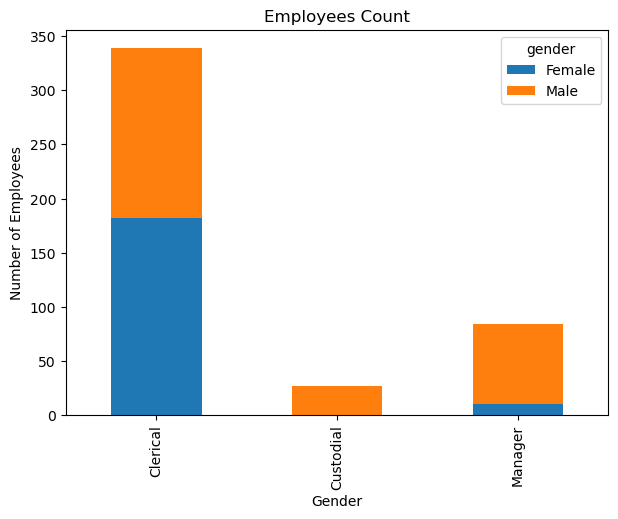

In [32]:
# Stacked Bar Chart
empdata.groupby(['jobcat', 'gender'])['gender'].count().unstack().plot(kind='bar', figsize=(7,5),
                                                                stacked = True,
                                                                xlabel="Gender",
                                                                ylabel="Number of Employees", 
                                                                title="Employees Count")
plt.show()

##### 3. What is the average salary of managers, clerical staff etc. (i.e. Job Category) working in the company?

In [35]:
empdata.groupby(['jobcat'])['salary'].mean()

jobcat
Clerical     28196.578171
Custodial    30938.888889
Manager      63977.797619
Name: salary, dtype: float64

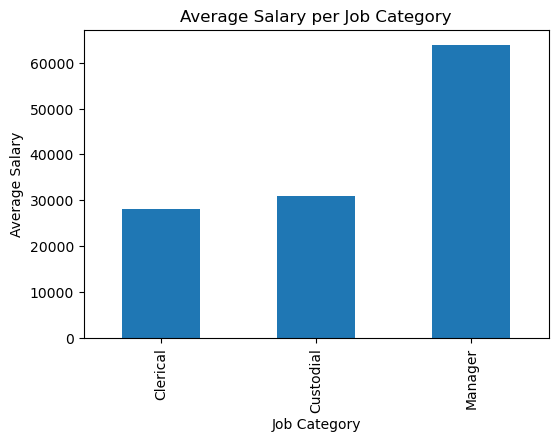

In [41]:
empdata.groupby(['jobcat'])['salary'].mean().plot(kind='bar', figsize=(6,4),
                                                                xlabel="Job Category",
                                                                ylabel="Average Salary", 
                                                                title="Average Salary per Job Category")
plt.show()

In [37]:
# Descriptive Analysis of the Quantitative variable (Salary) w.r.t Job Category
empdata.groupby(['jobcat'])['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
jobcat,,,,,,,,
Clerical,339.0,28196.578171,7614.521509,15750.0,23250.00,26850.0,31500.00,80000.0
Custodial,27.0,30938.888889,2114.616411,24300.0,30150.00,30750.0,30975.00,35250.0
Manager,84.0,63977.797619,18244.775970,34410.0,51956.25,60500.0,71281.25,135000.0


##### 4. What is the average salary of managers, clerical staff etc. (i.e. Job Category) working in the company by gender? 

In [42]:
empdata.groupby(['jobcat','gender'])['salary'].mean()

jobcat     gender
Clerical   Female    25296.758242
           Male      31558.152866
Custodial  Male      30938.888889
Manager    Female    47213.500000
           Male      66243.243243
Name: salary, dtype: float64

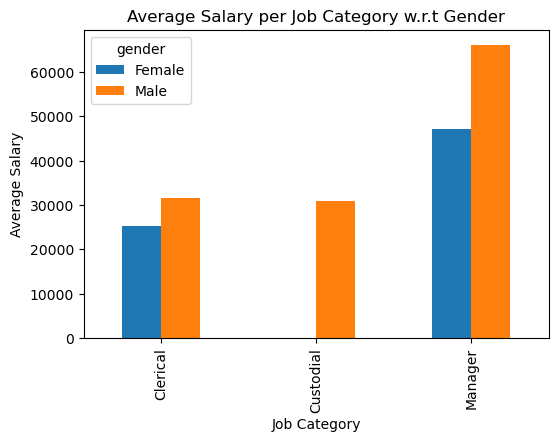

In [47]:
empdata.groupby(['jobcat','gender'])['salary'].mean().unstack().plot(kind='bar', figsize=(6,4),
                                                                xlabel="Job Category",
                                                                ylabel="Average Salary", 
                                                                title="Average Salary per Job Category w.r.t Gender")
plt.show()

##### 5. Classify the employees with respect to their education level?

In [106]:
empdata.groupby(['educ'])['educ'].count()

educ
8      51
12    171
14      6
15    114
16     58
17     11
18      9
19     27
20      2
21      1
Name: educ, dtype: int64

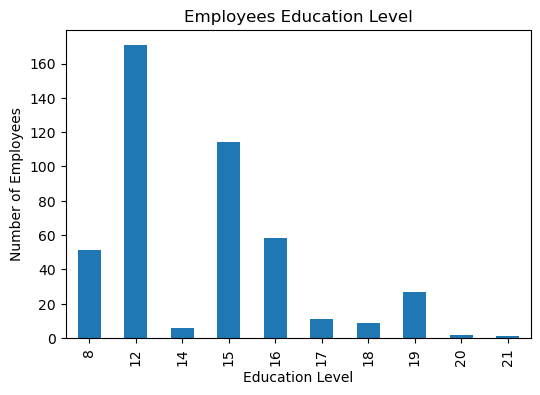

In [107]:
empdata.groupby(['educ'])['educ'].count().plot(kind='bar', figsize=(6,4),
                                                                xlabel="Education Level",
                                                                ylabel="Number of Employees", 
                                                                title="Employees Education Level")
plt.show()

##### 6. Identify the average salary per employee working in the organization? identify with respect to education level, Job category and gender?

In [113]:
empdata.groupby(['educ', 'jobcat', 'gender'])['salary'].mean()

educ  jobcat     gender
8     Clerical   Female    21819.642857
                 Male      24840.000000
      Custodial  Male      30807.692308
12    Clerical   Female    24443.669725
                 Male      28237.500000
      Custodial  Male      31580.769231
      Manager    Male      59400.000000
14    Clerical   Male      31625.000000
15    Clerical   Female    27309.677419
                 Male      32921.282051
      Custodial  Male      24300.000000
      Manager    Male      47662.500000
16    Clerical   Female    34846.153846
                 Male      37919.500000
      Manager    Female    47213.500000
                 Male      60098.000000
17    Clerical   Female    29100.000000
                 Male      33600.000000
      Manager    Male      69812.500000
18    Clerical   Male      55412.500000
      Manager    Male      67903.571429
19    Clerical   Male      36000.000000
      Manager    Male      73925.000000
20    Manager    Male      64312.500000
21    Manager   

##### 7. What is the distribution of Employee Salary?

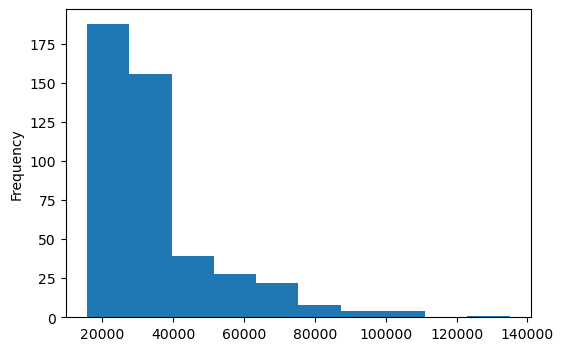

In [8]:
# Histogram
empdata['salary'].plot(kind='hist', figsize=(6,4))
plt.show()

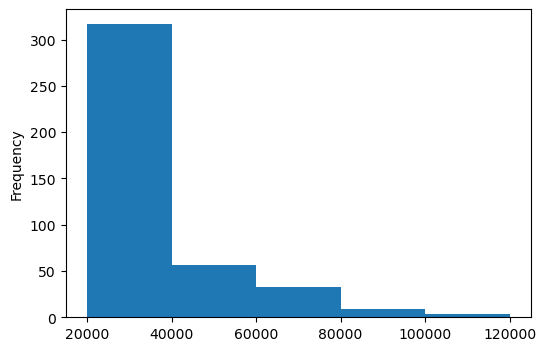

In [9]:
# Histogram with specified bins
empdata['salary'].plot(kind='hist', bins = [20000, 40000, 60000, 80000, 100000, 120000], figsize=(6,4))
plt.show()

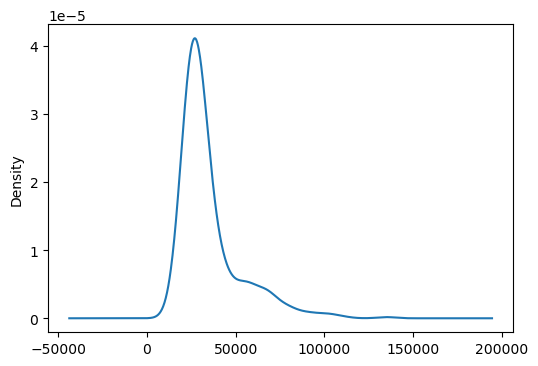

In [11]:
# Density Plot (Kernel Density Estimation) - It is a variation of the histogram that uses ‘kernel smoothing’ while plotting the values.
empdata['salary'].plot(kind='density', figsize=(6,4))
plt.show()

##### 8. Compare the job category with respect to previous experience (i.e., min, max & average wise)

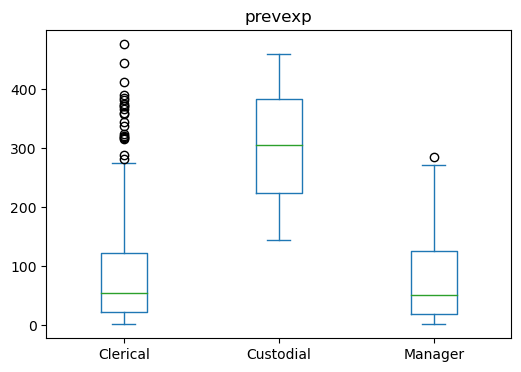

In [17]:
empdata[['prevexp','jobcat']].plot(kind='box', by='jobcat', figsize=(6,4))
plt.show()

##### 9. Is the current salary has any relationship with starting salary?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


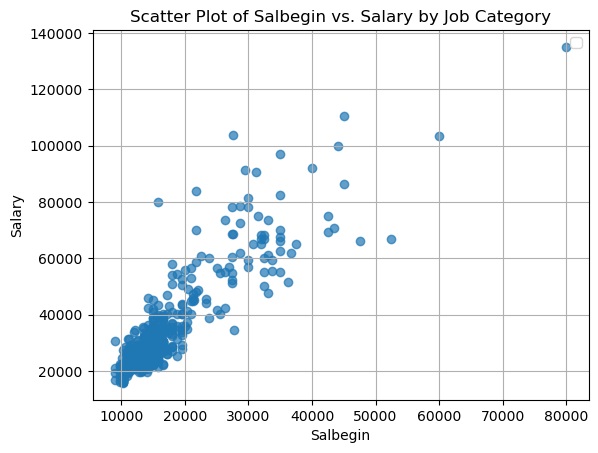

In [37]:
plt.scatter(empdata['salbegin'], empdata['salary'], alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Salbegin vs. Salary by Job Category')
plt.xlabel('Salbegin')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

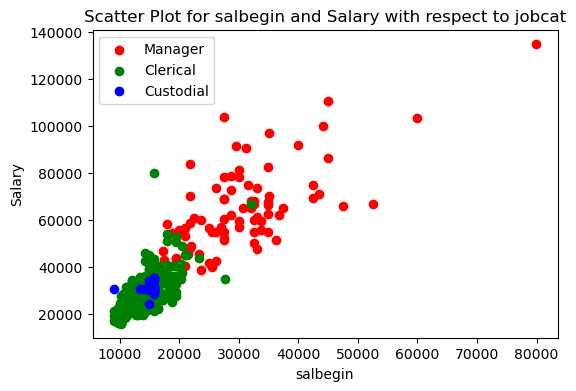

In [36]:
plt.figure(figsize=(6, 4))
colors = {'Manager': 'red', 'Clerical': 'green', 'Custodial': 'blue'}  # Assigning colors to jobcat values

# Scatter plot for jobcat A
plt.scatter(empdata[empdata['jobcat'] == 'Manager']['salbegin'], empdata[empdata['jobcat'] == 'Manager']['salary'], color=colors['Manager'], label='Manager')

# Scatter plot for jobcat B
plt.scatter(empdata[empdata['jobcat'] == 'Clerical']['salbegin'], empdata[empdata['jobcat'] == 'Clerical']['salary'], color=colors['Clerical'], label='Clerical')

# Scatter plot for jobcat C
plt.scatter(empdata[empdata['jobcat'] == 'Custodial']['salbegin'], empdata[empdata['jobcat'] == 'Custodial']['salary'], color=colors['Custodial'], label='Custodial')

plt.title('Scatter Plot for salbegin and Salary with respect to jobcat')
plt.xlabel('salbegin')
plt.ylabel('Salary')
plt.legend()
plt.show()

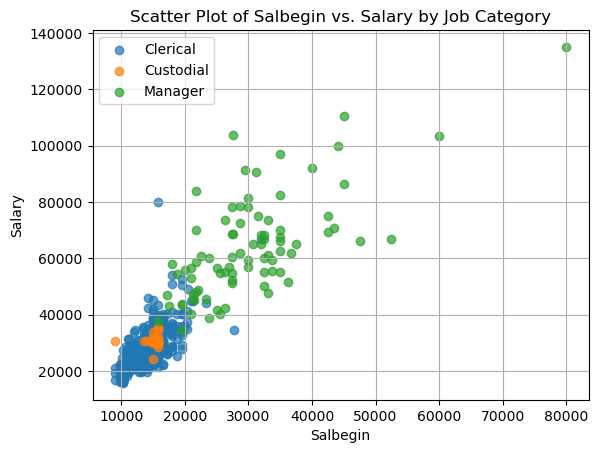

In [34]:
for jobcat, group in empdata.groupby('jobcat'):
    plt.scatter(group['salbegin'], group['salary'], label=f'{jobcat}', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Salbegin vs. Salary by Job Category')
plt.xlabel('Salbegin')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()
